In [34]:
import numpy as np
from scipy.integrate import solve_ivp
import pandas as pd
import matplotlib.pyplot as plt
from reservoirpy.observables import nrmse, rsquare

import reservoirpy as rpy

rpy.verbosity(0)

from reservoirpy.nodes import Reservoir, Ridge
from reservoirpy.datasets import mackey_glass

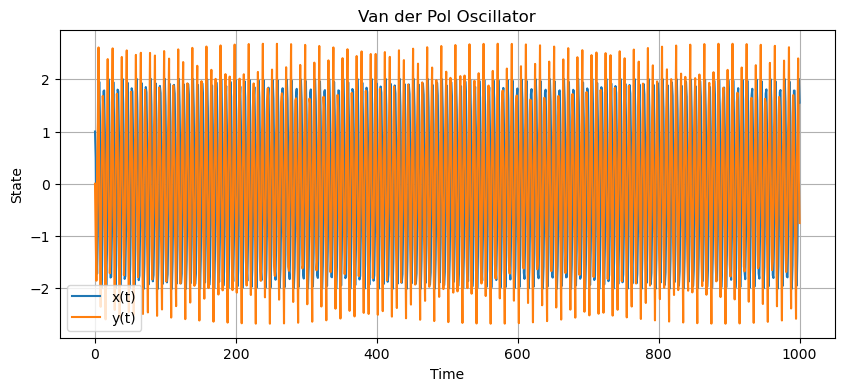

In [35]:
def van_der_pol(t, z, mu):
    x, y = z
    dxdt = y
    dydt = mu * (1 - x**2) * y - x
    return [dxdt, dydt]

mu = 1.0
initial_state = [1.0, 0.0]
t_span = (0, 1000)

sol = solve_ivp(van_der_pol, t_span, initial_state, args=(mu,), dense_output=True, t_eval=np.linspace(t_span[0], t_span[1], 1000))

t = sol.t
z = sol.y

# CSVファイルにデータを保存
data0 = pd.DataFrame({'Time': t, 'x': z[0], 'y': z[1]})
data0.to_csv('vanderpol_dataset.csv', index=False)

# CSVファイルを読み込む
data_loaded = pd.read_csv('vanderpol_dataset.csv')

# データをプロット
plt.figure(figsize=(10, 4))
plt.plot(data_loaded['Time'], data_loaded['x'], label='x(t)')
plt.plot(data_loaded['Time'], data_loaded['y'], label='y(t)')
plt.xlabel('Time')
plt.ylabel('State')
plt.legend()
plt.grid()
plt.title('Van der Pol Oscillator')
plt.show()


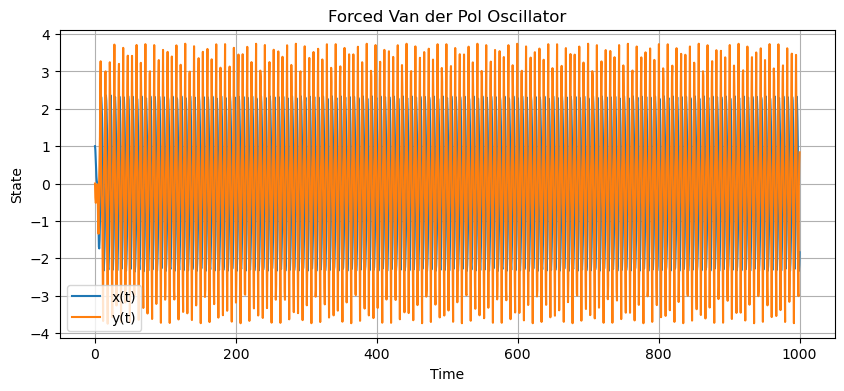

In [36]:
import numpy as np
from scipy.integrate import solve_ivp
import pandas as pd
import matplotlib.pyplot as plt

def forced_van_der_pol(t, z, mu, A, omega):
    x, y = z
    dxdt = y
    dydt = mu * (1 - x**2) * y - x + A * np.sin(omega * t)
    return [dxdt, dydt]

mu = 1.0
A = 1.0
omega = 1.0
initial_state = [1.0, 0.0]
t_span = (0, 1000)

sol = solve_ivp(forced_van_der_pol, t_span, initial_state, args=(mu, A, omega), dense_output=True, t_eval=np.linspace(t_span[0], t_span[1], 2000))

t = sol.t
z = sol.y

# CSVファイルにデータを保存
data = pd.DataFrame({'Time': t, 'x': z[0], 'y': z[1]})
data.to_csv('forced_vanderpol_dataset.csv', index=False)

# CSVファイルを読み込む
data_loaded = pd.read_csv('forced_vanderpol_dataset.csv')

# データをプロット
plt.figure(figsize=(10, 4))
plt.plot(data_loaded['Time'], data_loaded['x'], label='x(t)')
plt.plot(data_loaded['Time'], data_loaded['y'], label='y(t)')
plt.xlabel('Time')
plt.ylabel('State')
plt.legend()
plt.grid()
plt.title('Forced Van der Pol Oscillator')
plt.show()


In [37]:
X = data

In [38]:
def plot_vanderpol(X, t_span, timesteps):
    t = np.linspace(0, t_span[1], timesteps)
    z = sol.sol(t)

    plt.figure(figsize=(10, 4))
    plt.plot(t, z[0], label='x(t)')
    plt.plot(t, z[1], label='y(t)')
    plt.xlabel('Time')
    plt.ylabel('State')
    plt.legend()
    plt.grid()
    plt.title('Van der Pol Oscillator')
    plt.show()

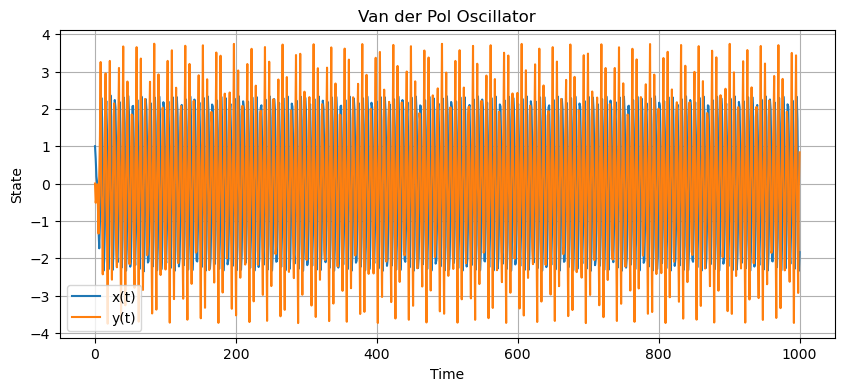

In [40]:
plot_vanderpol(X, t_span, 1000)